# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load 
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,3/6/19 4:28,34.58,3.908450e+12,46,Urban


In [3]:
#Change ride_id into int
pyber_data_df.dtypes
pyber_data_df['ride_id']=pyber_data_df['ride_id'].astype(int)
pyber_data_df.dtypes

city             object
date             object
fare            float64
ride_id           int64
driver_count      int64
type             object
dtype: object

## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
rides_per_type=pyber_data_df.groupby('type').count()['ride_id']
rides_per_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
driver_per_type=pyber_data_df.groupby('type').sum()['driver_count']
driver_per_type

type
Rural         537
Suburban     8570
Urban       59602
Name: driver_count, dtype: int64

In [6]:
#  3. Get the total amount of fares for each city type
fare_per_type=pyber_data_df.groupby('type').sum()['fare']
fare_per_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [7]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride=fare_per_type/rides_per_type
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [8]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver=fare_per_type/driver_per_type
avg_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [9]:
#  6. Create a PyBer summary DataFrame. 
my_dict={
    'Total Rides': rides_per_type,
    'Total Drivers':driver_per_type,
    'Total Fares': fare_per_type,
    'Average Fare Per Ride': avg_fare_per_ride,
    'Average Fare Per Driver': avg_fare_per_driver
}
pyber_summary_df=pd.DataFrame(my_dict)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
type,,,,,
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [10]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.dtypes

Total Rides                  int64
Total Drivers                int64
Total Fares                float64
Average Fare Per Ride      float64
Average Fare Per Driver    float64
dtype: object

In [11]:
#  8. Format the columns.
pyber_summary_df['Total Rides']=pyber_summary_df['Total Rides'].map('{:,}'.format)
pyber_summary_df['Total Drivers']=pyber_summary_df['Total Drivers'].map('{:,}'.format)
pyber_summary_df['Total Fares']=pyber_summary_df['Total Fares'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare Per Ride']=pyber_summary_df['Average Fare Per Ride'].map('${:,.2f}'.format)
pyber_summary_df['Average Fare Per Driver']=pyber_summary_df['Average Fare Per Driver'].map('${:,.2f}'.format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare Per Ride,Average Fare Per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [12]:
# 1. Read the merged DataFrame
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df['ride_id']=pyber_data_df['ride_id'].astype(int)
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/19 10:14,13.83,5739410000000,5,Urban
1,South Michelleport,3/4/19 18:24,30.24,2343910000000,72,Urban
2,Port Samanthamouth,2/24/19 4:29,33.44,2005070000000,57,Urban
3,Rodneyfort,2/10/19 23:22,23.44,5149250000000,34,Urban
4,South Jack,3/6/19 4:28,34.58,3908450000000,46,Urban


In [13]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
df=pyber_data_df.groupby(['type', 'date']).sum()[['fare']]
df

fare
type  date                
Rural 1/1/19 9:45    43.69
      1/11/19 4:39   16.42
      1/14/19 15:58  54.10
      1/14/19 7:09   18.05
      1/15/19 21:44  30.26
...                    ...
Urban 5/8/19 1:54    32.69
      5/8/19 2:31    41.33
      5/8/19 4:20    21.99
      5/8/19 4:39    18.45
      5/8/19 7:29    18.55

[2364 rows x 1 columns]

In [14]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
df = df.reset_index()
df['date']= pd.to_datetime(df['date'])
df.dtypes

type            object
date    datetime64[ns]
fare           float64
dtype: object

In [15]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df=df.pivot(index='date', columns='type', values='fare')
pivot_df.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [73]:
#organize the dataframe header
#RenameCol=list(pivot_df.columns.get_level_values(0))
#pivot_df.columns =RenameCol
#pivot_df.index.name = None
#pivot_df

pandas.core.frame.DataFrame

In [16]:
# 6. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
df_new=pivot_df.loc['2019-01-01':'2019-04-29']
df_new.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 02:07:00,NaN,24.07,NaN
2019-01-01 03:46:00,NaN,NaN,7.57
2019-01-01 05:23:00,NaN,NaN,10.75


In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2204 entries, 2019-01-01 00:08:00 to 2019-04-29 23:10:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     116 non-null    float64
 1   Suburban  576 non-null    float64
 2   Urban     1515 non-null   float64
dtypes: float64(3)
memory usage: 68.9 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
df_resample=df_new.resample('W').sum()
df_resample

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


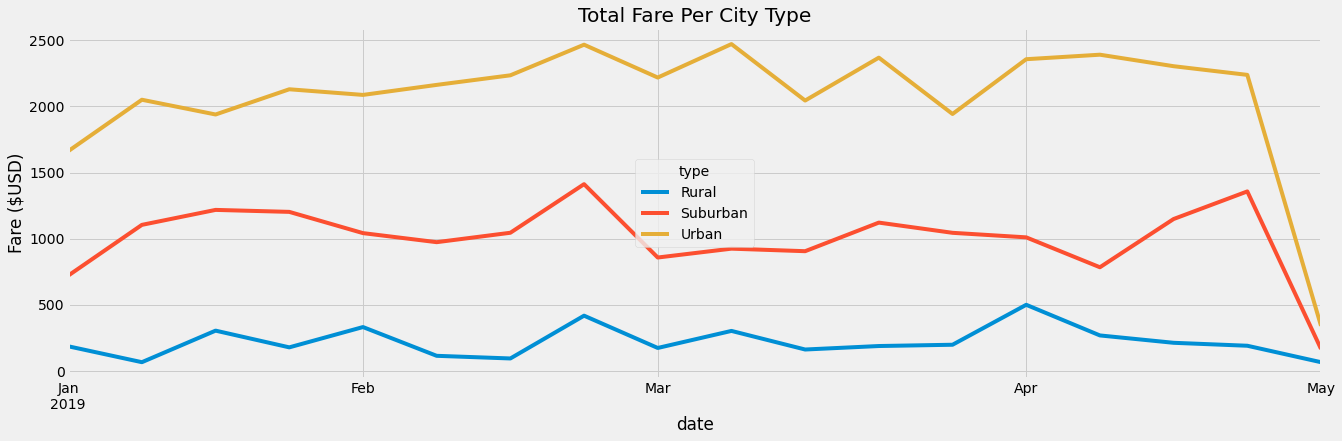

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
weekly_fare=df_resample.plot(figsize = (20,6))
weekly_fare.set_ylabel('Fare ($USD)')
weekly_fare.set_title('Total Fare Per City Type')
plt.savefig('Analysis/PyBer_fare_summary.png')
plt.show()
